# Amazone TV SHows and Movies EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

In [5]:
# load csv files
credit_df=pd.read_csv(r'C:\Users\Dell\Downloads\credits.csv')  
title_df=pd.read_csv(r'C:\Users\Dell\Downloads\titles.csv')

# Explore Credit Data

In [6]:
credit_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [7]:
#shape of a data
credit_df.shape

(124235, 5)

In [8]:
#information of data
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [11]:
#sum the null Value
credit_df.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

#character have 16287 null value

In [12]:
#percentage of missing value
round(100*(credit_df.isnull().sum()/len(credit_df.index)),2)

person_id     0.00
id            0.00
name          0.00
character    13.11
role          0.00
dtype: float64

character column has 13% missing value

In [13]:
# Replace the missing value with 'no data'
credit_df.replace(np.nan,'No Data',inplace=True)

In [14]:
credit_df.duplicated().sum()

56

# Explore the title detail

In [15]:
title_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [16]:
# shape of data
title_df.shape

(9871, 15)

In [17]:
#information of data
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [18]:
# missing value
title_df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [21]:
#percentage of missing value in a columns
round(100*(title_df.isnull().sum()/len(title_df.index)),2)

id                       0.00
title                    0.00
type                     0.00
description              1.21
release_year             0.00
age_certification       65.72
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 86.25
imdb_id                  6.76
imdb_score              10.34
imdb_votes              10.44
tmdb_popularity          5.54
tmdb_score              21.09
dtype: float64

age_certification and seasons more than 60 % missing value.drop those columns

In [22]:
title_df=title_df.drop(columns=['seasons','age_certification'])

In [26]:
#INPUT THE VALUE REST OF NULL COLUMNS
title_df['imdb_id'].replace(np.nan,'No Data',inplace=True)
title_df['description'].replace(np.nan,'No Data',inplace=True)
title_df['imdb_score']=title_df['imdb_score'].fillna(title_df['imdb_score'].mode()[0])
title_df['imdb_votes']=title_df['imdb_votes'].fillna(title_df['imdb_votes'].mode()[0])
title_df['tmtb_popularity']=title_df['tmdb_popularity'].fillna(title_df['tmdb_popularity'].mode()[0])
title_df['tmdb_score']=title_df['tmdb_score'].fillna(title_df['tmdb_score'].mode()[0])

In [27]:
title_df['production_countries'] = title_df['production_countries'].str[2:4]
for i in range(len(title_df['production_countries'])):
    if title_df['production_countries'][i] == '':
        title_df['production_countries'][i] = 'Unknown'

In [28]:
credit_df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [29]:
title_df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmtb_popularity
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",US,tt0850645,8.6,1092.0,15.424,7.6,15.424
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",US,tt0017925,8.2,89766.0,8.647,8.0,8.647
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",US,tt0036868,8.1,63026.0,8.435,7.8,8.435
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",US,tt0032599,7.8,57835.0,11.270,7.4,11.270
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",US,tt0042593,7.9,30924.0,8.273,7.6,8.273


# EDA

<AxesSubplot:title={'center':'highest release year'}, xlabel='release_year', ylabel='count'>

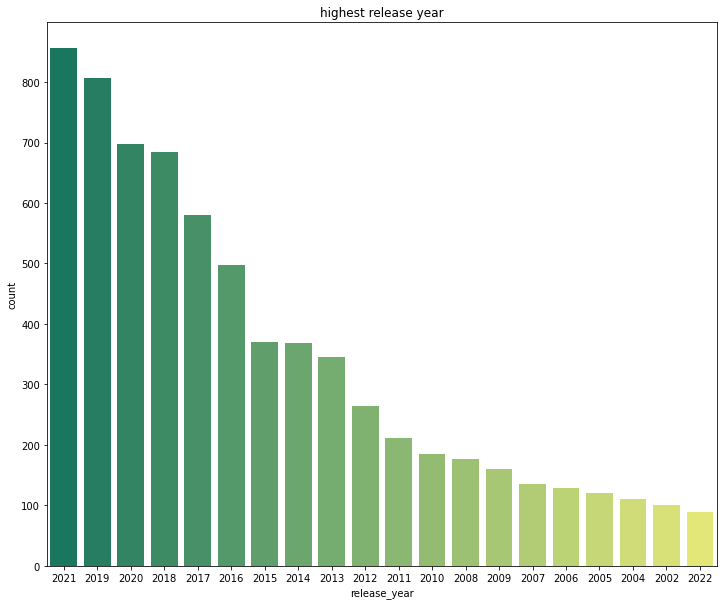

In [30]:
#top 20 years maximum movies and tv shows were added
plt.figure(figsize=(12,10))
plt.title('highest release year')
sns.countplot(x='release_year',data=title_df,order=title_df['release_year'].value_counts().index[:20],palette='summer')

shows that 2021 maximum number of realeses movies and shows

<AxesSubplot:title={'center':'Movies VS Shows'}, xlabel='type', ylabel='count'>

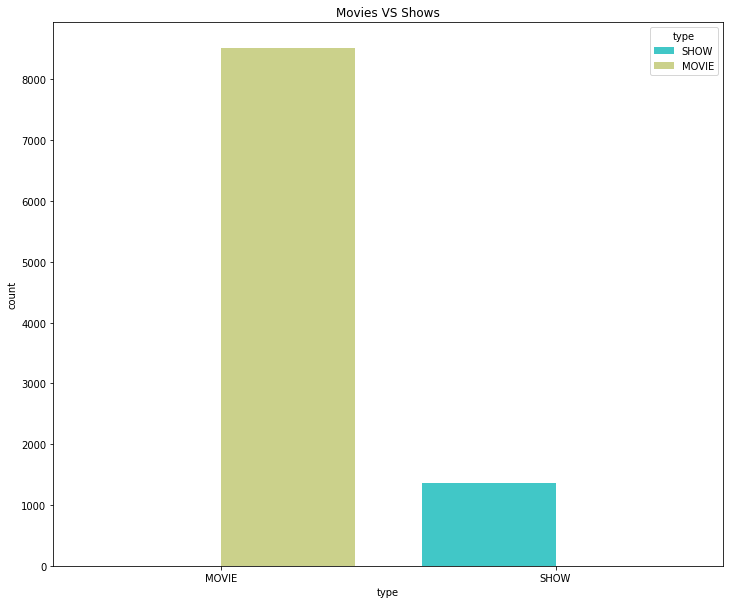

In [31]:
# Top 20 Years Maximum movies or shows added
plt.figure(figsize=(12,10))
plt.title('Movies VS Shows')
sns.countplot(x='type',data=title_df,order=title_df['type'].value_counts().index[:20],hue='type',palette='rainbow')

it shows that maximum no of moview=s release as compair to shows

<AxesSubplot:title={'center':'Top Production Countries'}, xlabel='production_countries', ylabel='count'>

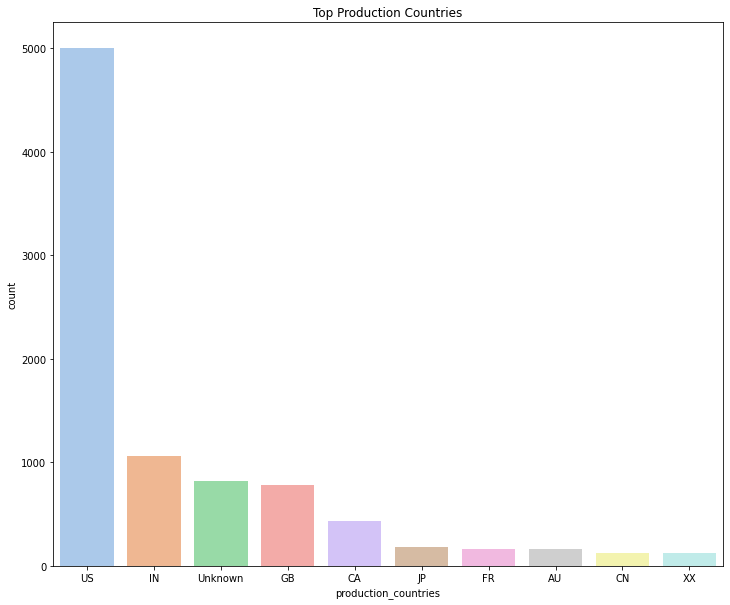

In [33]:
# Top 10 production countries
plt.figure(figsize=(12,10))
plt.title('Top Production Countries')
sns.countplot(x='production_countries',data=title_df,order=title_df['production_countries'].value_counts().index[:10],
        palette='pastel')

it shows that US maximum produce movies and shows

<AxesSubplot:title={'center':'Top Countries having Most Content'}, xlabel='production_countries', ylabel='count'>

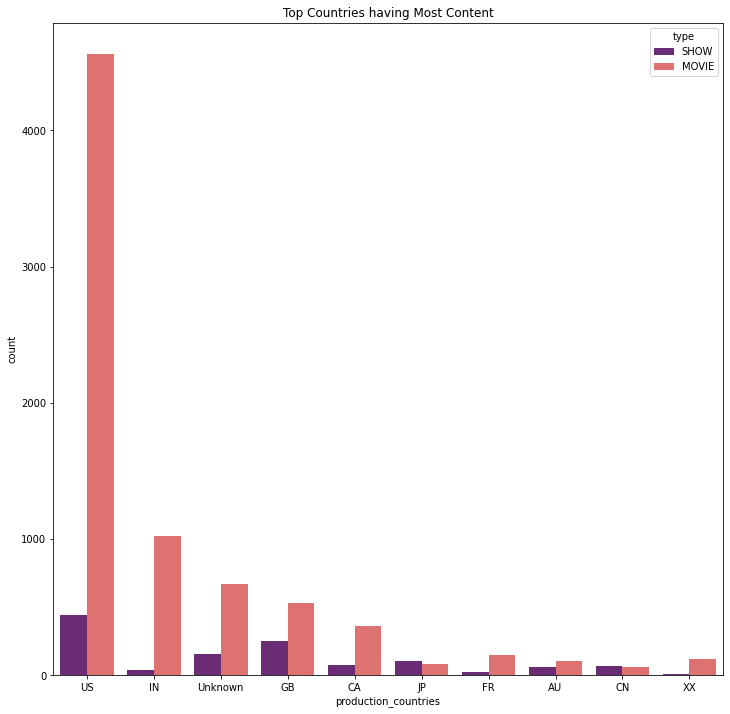

In [34]:
#top countries having most content
plt.figure(figsize=(12,12))
plt.title('Top Countries having Most Content')
sns.countplot(x='production_countries',data=title_df,order=title_df['production_countries'].value_counts().index[:10],hue='type',palette='magma')


# Popularity Based 

In [35]:
new_df=title_df[['title','type','genres','production_countries','release_year','imdb_score','imdb_votes']]

In [36]:
new_df=new_df[new_df['imdb_votes']>500]

In [41]:
new_df=new_df.sort_values(by=['imdb_votes','imdb_score'],ascending=False)

In [42]:
new_df.head()

,title,type,genres,production_countries,release_year,imdb_score,imdb_votes
2220,Titanic,MOVIE,"['drama', 'romance']",US,1997,7.9,1133692.0
2230,The Usual Suspects,MOVIE,"['thriller', 'crime', 'drama']",US,1995,8.5,1059480.0
2237,Braveheart,MOVIE,"['drama', 'history', 'war']",US,1995,8.4,1016629.0
2229,The Sixth Sense,MOVIE,"['thriller', 'drama']",US,1999,8.2,967864.0
1814,The Terminator,MOVIE,"['thriller', 'action', 'scifi']",US,1984,8.1,841706.0


In [45]:
popular_types=new_df[new_df['release_year']==2022]
popular_Movies=popular_types[popular_types['type']=='MOVIE']
popular_Movies

,title,type,genres,production_countries,release_year,imdb_score,imdb_votes
9167,Gehraiyaan,MOVIE,"['romance', 'drama', 'comedy']",IN,2022,6.5,41054.0
8988,Bachchhan Paandey,MOVIE,"['action', 'crime', 'drama', 'comedy']",IN,2022,7.1,31853.0
8964,Hotel Transylvania: Transformania,MOVIE,"['fantasy', 'romance', 'animation', 'comedy', ...",US,2022,6.0,26244.0
9009,Radhe Shyam,MOVIE,"['romance', 'drama']",IN,2022,6.9,21328.0
8934,All the Old Knives,MOVIE,['thriller'],US,2022,6.1,14686.0
8952,I Want You Back,MOVIE,"['romance', 'family', 'comedy']",US,2022,6.6,14574.0
9276,Mahaan,MOVIE,"['action', 'drama', 'thriller', 'crime']",IN,2022,8.2,12326.0
9330,Aaraattu,MOVIE,"['action', 'drama']",IN,2022,5.9,8968.0
9097,Sharmaji Namkeen,MOVIE,"['comedy', 'drama', 'family']",Unknown,2022,8.1,8830.0
8960,Master,MOVIE,"['thriller', 'horror', 'drama']",US,2022,4.9,3616.0


<AxesSubplot:title={'center':'popular movies in 2022'}, xlabel='imdb_score', ylabel='title'>

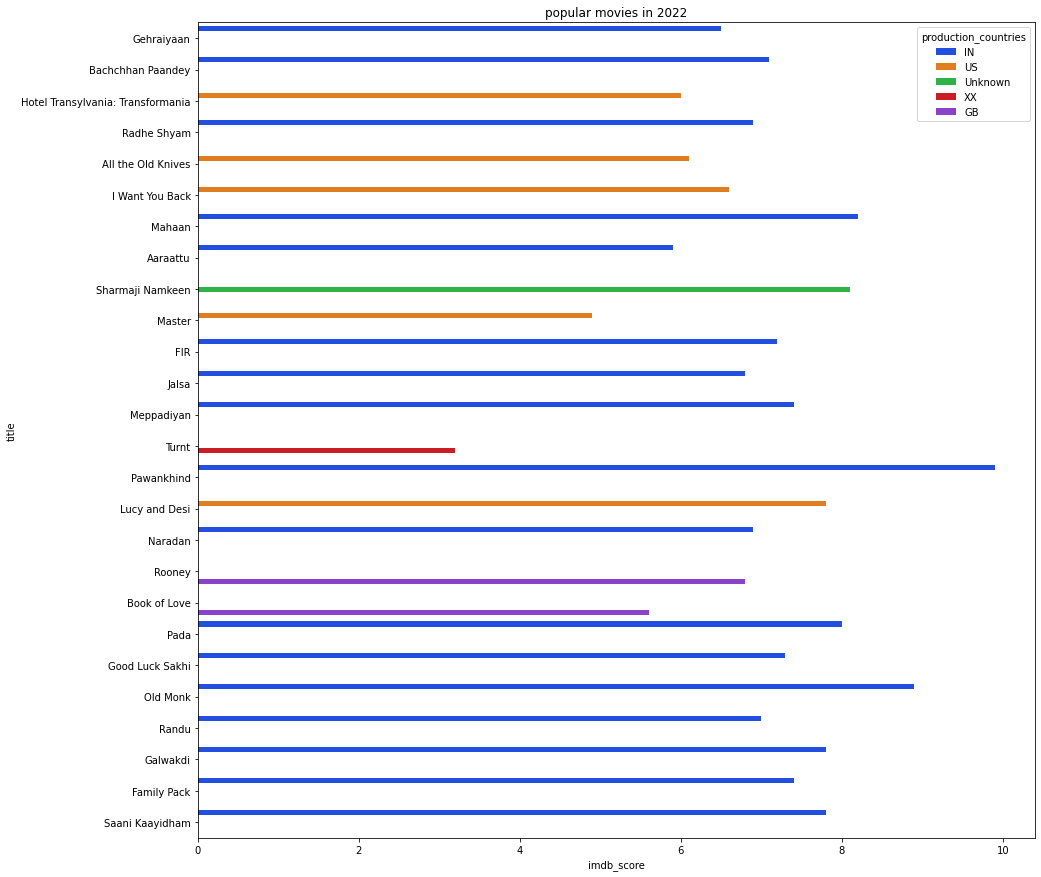

In [47]:
plt.figure(figsize=(15,15))
plt.title('popular movies in 2022')
sns.barplot(y='title',data=popular_Movies,x='imdb_score',hue='production_countries',palette='bright')

In [48]:
#Popular Show in 2022
popular_shows=popular_types[popular_types['type']=='SHOW']
popular_shows

,title,type,genres,production_countries,release_year,imdb_score,imdb_votes
8939,Reacher,SHOW,"['action', 'crime', 'drama', 'thriller']",US,2022,8.1,95704.0
8955,The Legend of Vox Machina,SHOW,"['animation', 'action', 'comedy', 'fantasy', '...",US,2022,8.5,18406.0
8926,Outer Range,SHOW,"['western', 'drama', 'thriller']",US,2022,7.3,11642.0
8970,The Boys Presents: Diabolical,SHOW,"['drama', 'scifi', 'animation', 'action', 'com...",US,2022,6.9,7846.0
8974,Power Book IV: Force,SHOW,"['crime', 'drama']",US,2022,8.1,4066.0
8930,Star Trek: Strange New Worlds,SHOW,"['scifi', 'action']",US,2022,8.1,3625.0
8969,As We See It,SHOW,"['comedy', 'drama']",US,2022,8.2,2818.0
8935,Super Pumped,SHOW,['drama'],US,2022,7.2,2756.0
9253,Bestseller,SHOW,"['drama', 'thriller']",IN,2022,5.9,1630.0
8929,The First Lady,SHOW,"['drama', 'history']",US,2022,5.9,1502.0


<AxesSubplot:title={'center':'Popular Shows in year 2022'}, xlabel='imdb_score', ylabel='title'>

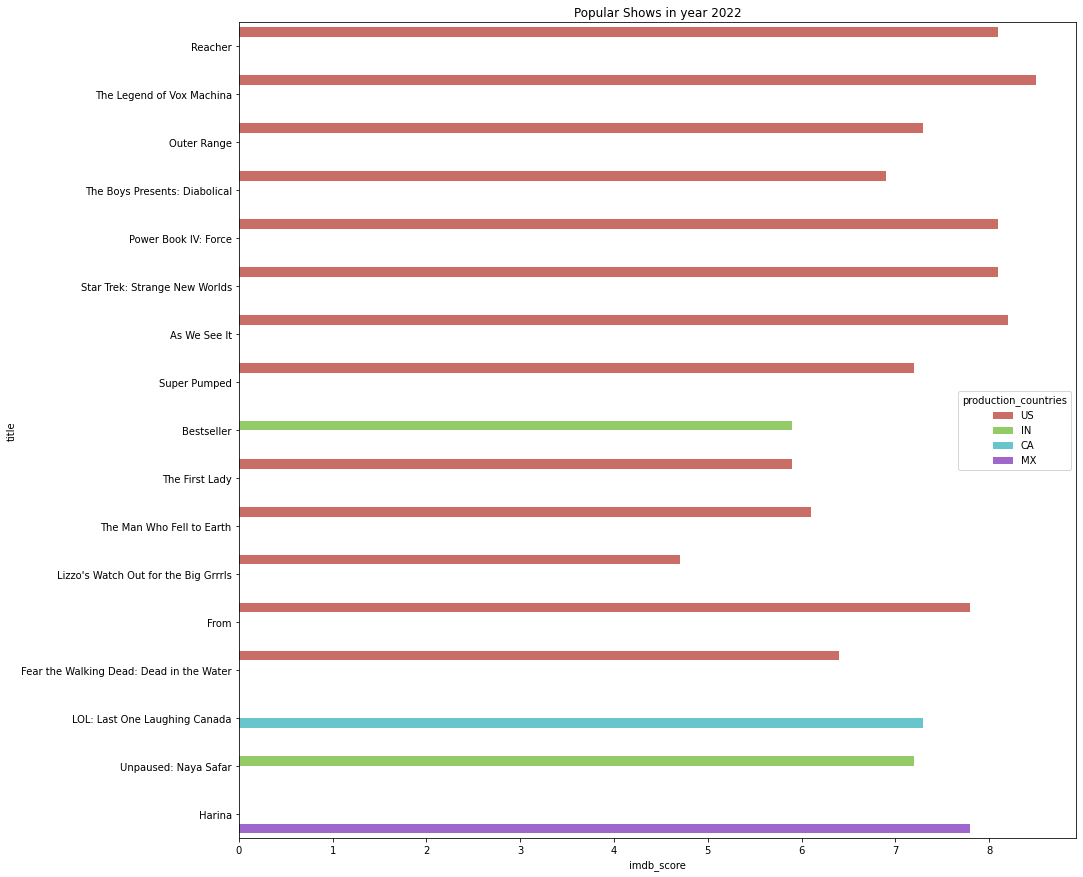

In [50]:
plt.figure(figsize=(15,15))
plt.title('Popular Shows in year 2022')
sns.barplot(y='title',data=popular_shows,x='imdb_score',hue='production_countries',palette='hls')